In [75]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import json
import os
from pprint import pprint
import helper
from importlib import reload
%matplotlib notebook

# Direct Solutions for Computing the Fundamental and Essential Matrix

This is from [this](https://youtu.be/6oMC_3iyeIM) video.

## Table of Contents
1. Compute the **fundamental matrix** given corresponding points
    - Using the 8-point algorithm
    - Using the 7-point algorithm
2. Compute the **essential matrix** given corresponding points
    - Using the 8-point algorithm
    - Using 2 or 4 points under special conditions
    - using the 5-point algorithm
3. Compute the **rotation matrix** and **basis** given  an essential matrix

## Fundamental Matrix (Uncalibrated Cameras)

The **fundamental matrix**, $F$, is

$$
(K^{\prime})^{-T}R^{\prime}S_{b}(R^{\prime\prime})^{T}(K^{\prime\prime})^{-1}\text{.}
$$

This matrix encodes the relative orientation for two uncalibrated cameras. The **coplanarity constraint** through the **fundamental matrix** is 

$$
x^{\prime}Fx^{\prime\prime} = 0\text{.}
$$

The **fundamental matrix** can be directly computed if we know the calibration matrices, $K^{\prime}$ and $K^{\prime\prime}$, the viewing direction of the cameras, $R^{\prime}$ and $R^{\prime\prime}$, the baseline, $S_{b}$, or the projection matrices, $P^{\prime}$ and $P^{\prime\prime}$.

## Problem Formulation

If we are given $N$ corresponding points:

$$
(x^{\prime}, y^{\prime})_{n}, (x^{\prime\prime}, y^{\prime\prime})_{n}\quad
n = 1, \dots, N\text{,}
$$

we can calculate the **fundamental matrix**.

## Fundamental Matrix from Corresponding Points

There is a coplanarity constraint for each corresponding point:

$$
x^{\prime}_{n}Fx^{\prime\prime}_{n} = 0\quad n = 1, \dots, N
$$

or 

$$
\begin{bmatrix}x_{n}^{\prime} & y_{n}^{\prime} & 1\end{bmatrix} 
\begin{bmatrix}F_{11} & F_{12} & F_{13} \\ F_{21} & F_{22} & F_{23} \\ F_{31} & F_{32} & F_{33} \end{bmatrix}
\begin{bmatrix}x_{n}^{\prime\prime} \\ y_{n}^{\prime\prime} \\ 1\end{bmatrix} =0\text{.}
$$

## Linear Dependency

This equation can be rewritten as a summation:

$$
x^{\prime\prime}_{n} F_{11} x^{\prime}_{n} + x^{\prime\prime}_{n} F_{12} x^{\prime}_{n} + \dots = 0\text{.}
$$

This summation can be rewritten:

$$
[x^{\prime\prime}_{n}x^{\prime}_{n}, x^{\prime\prime}_{n}y^{\prime}_{n}, x^{\prime\prime}_{n},
y^{\prime\prime}_{n}x^{\prime}_{n}, y^{\prime\prime}_{n}y^{\prime}_{n}, y^{\prime\prime}_{n},
x^{\prime}_{n}, y^{\prime}_{n}, 1] \cdot [F_{11}, F_{12}, F_{13}, F_{21}, F_{22}, F_{23}, F_{31}, F_{32}, F_{33}] = 0\quad n = 1, \dots, N\text{.}
$$

Again, we can define our knowns, $a_{n}^{T}$, and unknowns, $f^{T}$:

$$
\begin{align}
a_{n}^{T} =& [x^{\prime\prime}_{n}x^{\prime}_{n}, x^{\prime\prime}_{n}y^{\prime}_{n}, x^{\prime\prime}_{n},
y^{\prime\prime}_{n}x^{\prime}_{n}, y^{\prime\prime}_{n}y^{\prime}_{n}, y^{\prime\prime}_{n},
x^{\prime}_{n}, y^{\prime}_{n}, 1] \\ 
f^{T} =& [F_{11}, F_{12}, F_{13}, F_{21}, F_{22}, F_{23}, F_{31}, F_{32}, F_{33}]
\end{align}
$$

with

$$
a^{T}_{n} \cdot f^{T} = 0 \quad n = 1, \dots, N\text{.}
$$

## Using the Kronecker Product

The linear dependency can be rewritten as a Kronecker product:

$$
\begin{align}
a^{T}_{n} \cdot f^{T} =&\,0 \quad n = 1, \dots, N\\
(x^{\prime\prime}_{n} \otimes x^{\prime}_{n})^{T} \texttt{vec}(F) =&\,0\text{.}
\end{align}
$$

## Linear System From All Points

The Kronecker product can be rewritten as a single matrix,
$$
A = \begin{bmatrix}a_{1}^{T} \\ \dots \\ a_{n}^{T} \\ \dots \\ a_{N}^{T} \end{bmatrix}\text{,}
$$
to form the **coplanarity constraint**:
$$
Af=0\text{.}
$$

## Solving the Linear System

We can use **Singular Value Decomposition** to solve for $f$ in the equation $Af=0$. This provides a solution for 
$$
f = [F_{11}, F_{12}, F_{13}, F_{21}, F_{22}, F_{23}, F_{31}, F_{32}, F_{33}]^{T}\text{.}
$$

**Singular Value Decomposition** allows $f$ to be characterized  as a right-singular vector corresponding to a singular values of $A$ that is zero.

## How Many Corresponding Points Are Needed?

If the vector $f$ has nine dimensions, 
$$
A = \begin{bmatrix}a_{1}^{T} \\ \dots \\ a_{n}^{T} \\ \dots \\ a_{N}^{T} \end{bmatrix}\quad Af=0\text{,}
$$
we need eight corresponding points because the **fundamental matrix** is homogeneous and the $A$ matrix has the degrees of freedom of at most $8$.

## More Than 8 Points?

We know that the measures of the corresponding points will have noise. The singular vector, $\hat{f}$, of $A$ that corresponds to the *smallest* singular values is the solution.

## Enforcing Rank 2

The **fundamental matrix** must have a rank of $2$. $F$ should approximate the computed matrix, $\hat{F}$ as close as possible.

We can use the **singular value decomposition** of $\hat{F}$:

$$
F = UD^{\alpha}V^{T} = U\begin{bmatrix}D_{11} & 0 & 0 \\ 0 & D_{22} & 0 \\ 0 & 0 & 0\end{bmatrix}V^{T}
$$
with
$$
\hat{F} = UDV^{T}
$$
and
$$
D_{11} \ge D_{22} \ge D_{33}\text{.}
$$

<IPython.core.display.Javascript object>


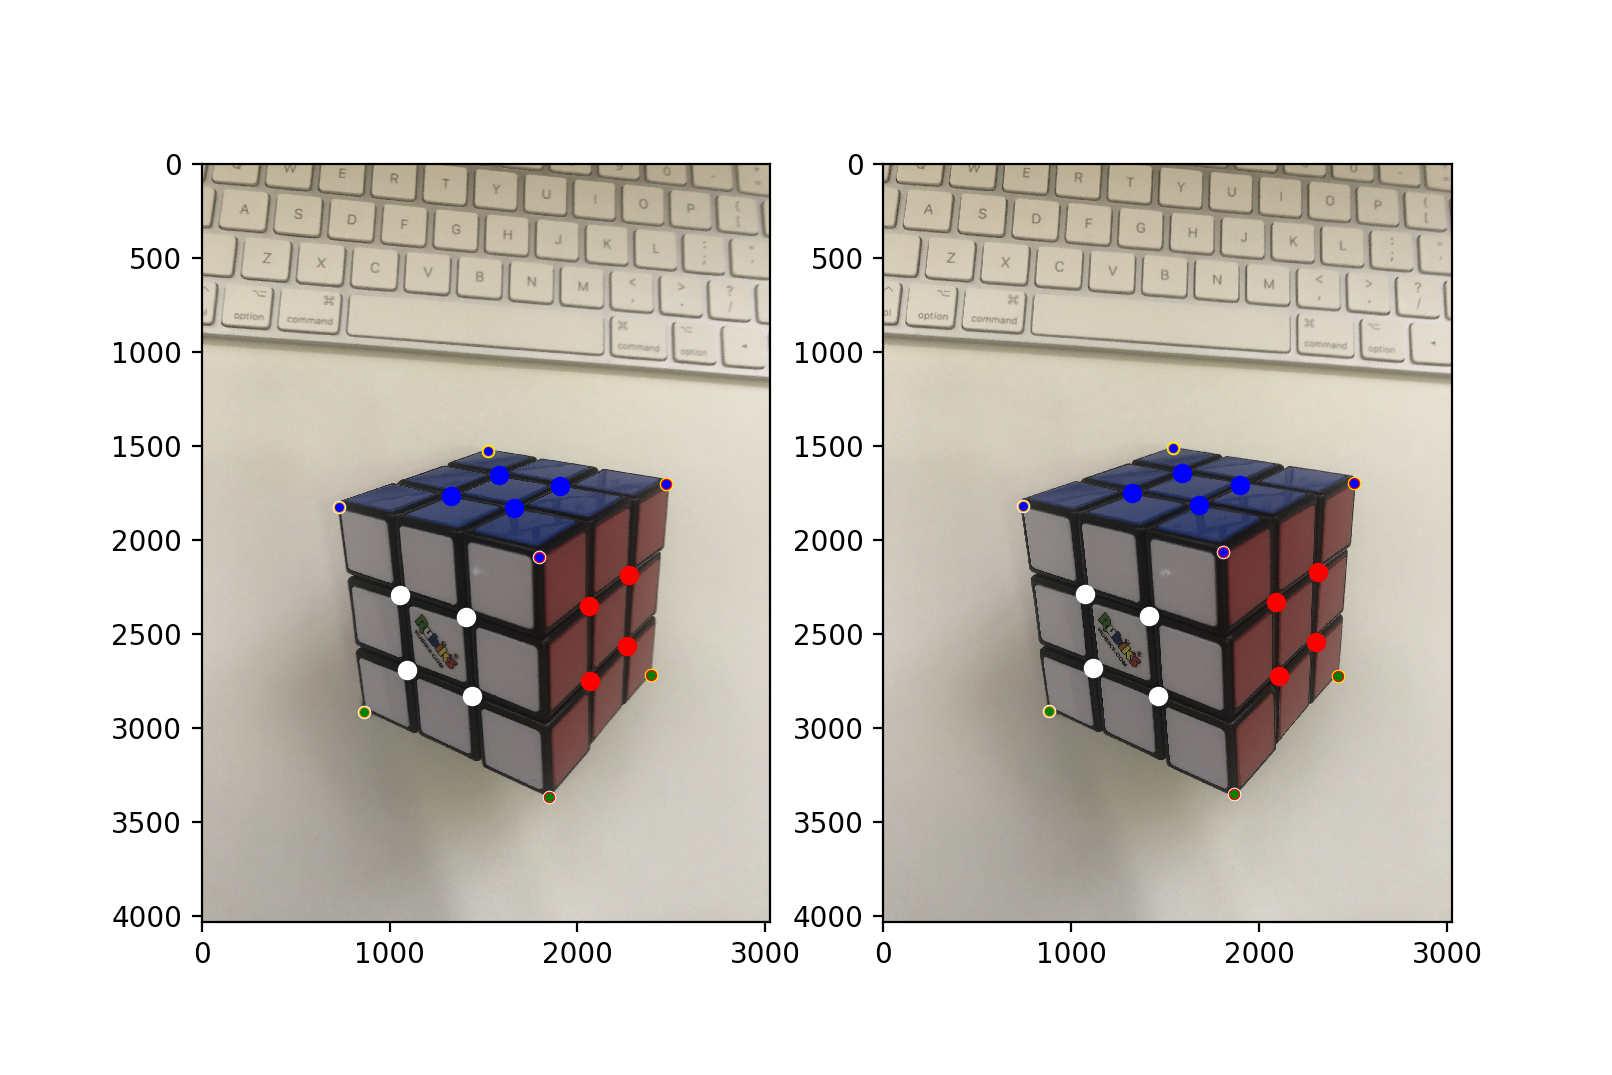

matrix([[-4.18577176e-15, -9.27516961e-10, -8.23475840e-10],
        [-6.17066023e-12,  3.43147593e-04, -3.42814491e-04],
        [ 2.40127980e-06,  2.70215149e-06,  9.99999882e-01]])


In [77]:
config = helper.read_images("config.json", "images")
image_1 = "1.JPG"
image_2 = "2.JPG"
matched_points = helper.match_points(image_1, image_2, config)
helper.show_images(image_1, image_2, config)
N = len(matched_points[image_1])
xs = np.hstack([np.matrix(matched_points[image_1]), np.matrix(np.ones(N)).transpose()])
xss = np.hstack([np.matrix(matched_points[image_2]), np.matrix(np.ones(N)).transpose()])
U, D, Vt = np.linalg.svd(np.kron(xs, xss))
Fa = np.reshape(Vt.transpose()[-1], (3, 3))
Ua, Da, Vat = np.linalg.svd(Fa)
F = Ua @ np.matrix([[Da[0], 0, 0], [0, Da[1], 0], [0, 0, 0]]) @ Vat
pprint(F)

The calculated $F$ matrix is very small. This is because the coordinates of the pixel values are extremely large. The problem must be conditioned: we must scale the pixel coordinates.

## Normalization to Obtain a Well-Conditioned Problem

The coordinates can be scaled to improve the stability of the problem. We must transform the points so that the center of mass of all points is at $(0, 0)$ and the $x$ and $y$ coordinates are bound within $-1$ and $1$.

## Normalization

We must transform the coordinates so that the coordinates are zero-centered and in $[-1, 1]$:

$$
T: Tx = \hat{x}\text{.}
$$

After normalizing the points, the **fundamental matrix**, $F$, can be determined with the transformed points:

$$
\begin{align}
(x^{\prime})^{T}F x^{\prime\prime} =&\, (T^{-1}\hat{x}^{\prime})^{T} F (T^{-1}\hat{x}^{\prime\prime})^{T} \\
=&\, (\hat{x}^{\prime})^{T}T^{-T}F T^{-1}\hat{x}^{\prime\prime} \\
=&\, (\hat{x}^{\prime})^{T}\hat{F}\hat{x}^{\prime\prime}\text{.}
\end{align}
$$

The **fundamental matrix** can then be obtained by the transformation, $T$:

$$
\hat{F} = T^{-T} F T^{-1} \\
F = T^{T} \hat{F} T\text{.}
$$

## Singularity

If all the corresponding coordinates lie on a plane, then the rank of the $A$ matrix is less than $8$. This causes a singularity because the result of the points on the plane are numerically instable.

If the projection centers of both cameras are identical, $X_{O^{\prime}} = X_{O^{\prime\prime}}$, the translation of the camera is zero. When the translation is zero, the points are numerically instable, causing a singularity.

## Direct Solution with 7 Points

The **fundamental matrix** has seven degrees of freedom. Because of this, there is a direct solution for seven points. 

We can use the two-dimensional null space of $A$:

$$
f = \lambda f_{1} + (1 - \lambda)f_{2}
$$

where $f_{1}$ and $f_{2}$ are the vectors spanning the null space.

We also know that the determinant of the $3 \times 3$ matrix must be zero: $|F| = 0$. 

These can be combine both of these facts into an equation of degree three, giving us three solutions.

## Summary So Far

The **fundamental matrix** can be approximated from $N$ pairs of corresponding points. The direct solution of $N > 7$ points is based on solving a homogeneous linear system, "8 Point Algorithm." The direct solution with exactly seven points provides three solutions.

Stachniss takes a break halfway through the video: [timestamp](https://youtu.be/6oMC_3iyeIM?t=2490)

## Essential Matrix

The **essential matrix**, $E$, is the **fundamental matrix** for calibrated cameras:
$$E = R^{\prime}S_{b}(R^{\prime\prime})^{T}\text{.}$$

This is often parameterized through: $E = S_{b}R^{T}$.

The **essential matrix** also has a specific **coplanarity constraint**: 

$$
(^{k}x^{\prime})^{T}E ^{k}x^{\prime\prime} = 0\text{.}
$$

## Essential Matrix from 8+ Corresponding Points

Again, each point has a **coplanarity constraint**,
$$
(^{k}x_{n}^{\prime})^{T}E ^{k}x_{n}^{\prime\prime} = 0\quad n = 1, \dots, N
$$
or
$$
\begin{bmatrix}^{k}x_{n}^{\prime} & ^{k}y_{n}^{\prime} & c^{\prime}\end{bmatrix} 
\begin{bmatrix}E_{11} & E_{12} & E_{13} \\ E_{21} & E_{22} & E_{23} \\ E_{31} & E_{32} & E_{33} \end{bmatrix}
\begin{bmatrix}^{k}x_{n}^{\prime\prime} \\ ^{k}y_{n}^{\prime\prime} \\ c^{\prime\prime}\end{bmatrix} =0\text{,}
$$

but now the points are in the camera's coordinate system. 

## Essential Matrix Constraints

When calculating the **essential matrix**, both non-zero singular values are identical,
$$
E = U\begin{bmatrix}d & 0 & 0 \\ 0 & d & 0 \\ 0 & 0 & 0\end{bmatrix}V^{T} = U\begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{bmatrix}V^{T}\text{,}
$$
making the equation homogeneous. Another way to show this would be:
$$
\begin{align}
E E^{T} =&\,(S_{b}R)(S_{b}R)^{T} \\
=&\,S_{b}R^{T}R S_{b}^{T} \\
=&\,-S_{b}S_{b}\text{.}
\end{align}
$$

## Normalization to Obtain a Well-Conditioned Problem

Again, the coordinates can be scaled to improve the stability of the problem. We must transform the points so that the center of mass of all points is at $(0, 0)$ and the $x$ and $y$ coordinates are bound within $-1$ and $1$.

## Properties of the Essential Matrix

We now now why the **essential matrix** is homogeneous. The determinant of the **essential matrix** is also zero, $|E| = 0$, but the **essential matrix** has two identical non-zero singular values:
$$
E = U\begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{bmatrix}V^{T}\text{.}
$$
We can use this fact with the **coplanarity constraint**:
$$
2EE^{T}E - \texttt{tr}(EE^{T})E = \begin{bmatrix}0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0\end{bmatrix}\text{.}
$$

## Essential Matrix in Case of Known Rotations

When the rotations of the cameras are known, we can simplify the **coplanarity constraint**:
$$
\begin{align}
(^{k}x^{\prime})^{T} E ^{k}x^{\prime\prime} =& 0 \\
(^{k}x^{\prime})^{T} S_{b} R^{T}\,^{k}x^{\prime\prime} =& \\
(^{k}x^{\prime})^{T} S_{b}\,^{1}x^{\prime\prime} =&
\end{align}
$$
where $^{1}x^{\prime\prime}$ is a point in the rotated image. We can do this because the degrees of freedom are limited to two because the rotation and scale has been identified. The basis must be identified.

So two corresponding points, 
$$
(^{k}x^{\prime}_{P}, ^{k}x^{\prime\prime}_{P}), (^{k}x^{\prime}_{Q}, ^{k}x^{\prime\prime}_{Q})\text{,}
$$
are sufficient to compute the basis by finding the normal vectors, $n_{P}$ and $n_{Q}$, of the **epipolar planes**:
$$
\begin{align}
n_{P} &=\, ^{k}x^{\prime}_{P} \times\, ^{k}x^{\prime\prime}_{P} \\
n_{Q} &=\, ^{k}x^{\prime}_{Q} \times\, ^{k}x^{\prime\prime}_{Q}\text{.}
\end{align}
$$
The **epipolar axis** is found by the cross product of the two normal vectors, 
$$
\begin{align}
\hat{B} &=\, n_{P} \times\,n_{Q} \\
 &=\, (^{k}x^{\prime}_{P} \times\, ^{k}x^{\prime\prime}_{P})\times(^{k}x^{\prime}_{Q} \times\, ^{k}x^{\prime\prime}_{Q})\text{,}
\end{align}
$$
because the **epipolar axis** is orthogonal to the surface normals of the **epipolar planes**.

In order to use this, we must make some assumptions:
1. The cameras are in different positions: $|B|>0$
2. The points, $(^{k}x^{\prime}_{P}, ^{k}x^{\prime\prime}_{P}), (^{k}x^{\prime}_{Q}, ^{k}x^{\prime\prime}_{Q})$, are in different **epipolar planes**
3. The points are not too far away, meaning the $^{k}x^{\prime}$ and $^{k}x^{\prime\prime}$ vectors are not parallel
4. The points do not lie on the **epipolar axis**

## Essential Matrix in case of Planar Object

When all points lie on a plane, we can express the transformation through homography:
$$
H = \lambda(R + T N / s_{A})\text{,}
$$
where $R$ is the rotation matrix, $T$ is the translation vector, $N$ is the normal vector, and $s_{A}$ is the distribution of the plane to the origin.

## 5 Point Algorithm

When five points are found with calibrated cameras, we can solve a polynomial of degree ten to produce ten possible solutions. This is often used in combination with **RANSAC** where **RANSAC** proposes the point correspondences and all solutions are evaluated.

## Computing the Basis and Rotation Given the Essential Matrix

We know that the **essential matrix** is composed of the rotation and translation between the two camera position, but we also know that the **essential matrix** is homogeneous:
$$
E = U\begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{bmatrix}V^{T}\text{.}
$$
The $U$ and $V$ matrices are the rotation matrices for the **essential matrix**. We can define
$$
Z = \begin{bmatrix}0 & 1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & 0\end{bmatrix}\quad W = \begin{bmatrix}0 & -1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1\end{bmatrix}
$$
where 
$$
ZW = \begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{bmatrix}\text{.}
$$
The inner matrix can now be replaced by $ZW$ where
$$
\begin{align}
E =&\, U\begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{bmatrix}V^{T}\\
=&\, U\begin{bmatrix}0 & 1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & 0\end{bmatrix}\begin{bmatrix}0 & -1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1\end{bmatrix}V^{T}\text{.}
\end{align}
$$
The product of the transpose of the rotation matrix and the rotation matrix results in the identity matrix:
$$
\begin{align}
E =&\, UZIWV^{T} \\
=&\, UZU^{T}UWV^{T}\text{.}
\end{align}
$$
Using the definition of the skew-symmetric matrix and the rotation matrix, the equation can be rewritten,
$$
\begin{align}
E =&\,  UZU^{T}UWV^{T} \\
=&\, S_{b}R^{T}\text{,}
\end{align}
$$
producing the skew-symmetric matrix, $S_{b}$, and the transpose of the rotation matrix, $R^{T}$. 

There are four different solutions for producing the inner matrix:
$$
\begin{align}
\begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{bmatrix} = ZW =&\, \begin{bmatrix}0 & 1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & 0\end{bmatrix} \begin{bmatrix}0 & -1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1\end{bmatrix} \\
= Z^{T}W^{T} =&\, \begin{bmatrix}0 & 1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & 0\end{bmatrix}^{T} \begin{bmatrix}0 & -1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1\end{bmatrix}^{T} \\
= -Z^{T}W =&\, -\begin{bmatrix}0 & 1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & 0\end{bmatrix}^{T} \begin{bmatrix}0 & -1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1\end{bmatrix} \\
= -ZW^{T} =&\, -\begin{bmatrix}0 & 1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & 0\end{bmatrix} \begin{bmatrix}0 & -1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1\end{bmatrix}^{T}\text{.}
\end{align}
$$
Three solutions are not physically possible. All solutions must be tested to find the correct solution.